In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('J/UDEMY-TSA-FINAL/Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'
df2 = pd.read_csv('J/UDEMY-TSA-FINAL/Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

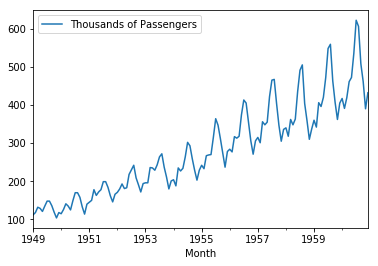

In [4]:
df1.plot()

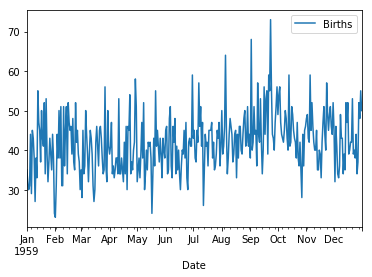

In [5]:
df2.plot()

In [8]:
!pip install pmdarima

  Found existing installation: Cython 0.27.3
    Uninstalling Cython-0.27.3:
      Successfully uninstalled Cython-0.27.3


smart-open 1.6.0 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
from pmdarima import auto_arima

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#help(auto_arima)
#y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False,
#information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch'

In [13]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, trace=True, information_criterion='aic')

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.107 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.001, Fit time=0.356 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.875, BIC=2485.258, Fit time=0.606 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.199 seconds
Total fit time: 1.402 seconds


In [14]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Fri, 26 Apr 2019   AIC                           2460.154
Time:                        21:28:54   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
stepwise_fit2 = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=True,
                           trace=True, information_criterion='aic', m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.022 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.231 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.107 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.323 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit

In [16]:
stepwise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Fri, 26 Apr 2019   AIC                           1267.601
Time:                                    21:32:57   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6775     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults, ARMA, ARMAResults

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
df2_new = df2[:120]

In [22]:
df3 = pd.read_csv('J/UDEMY-TSA-FINAL/Data/TradeInventories.csv', index_col='Date', parse_dates=True)
df3.index.freq = 'MS'

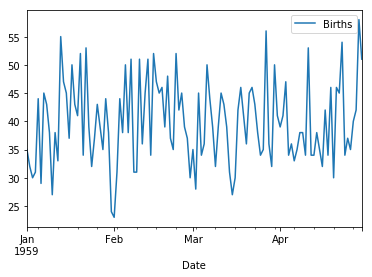

In [33]:
df2_new.plot()

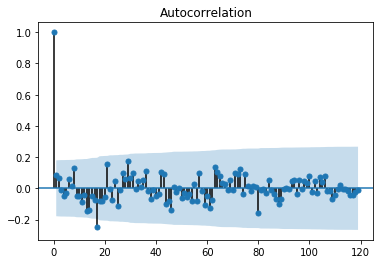

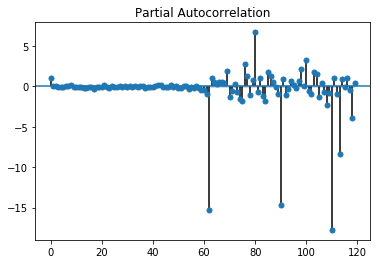

In [25]:
plot_acf(df2_new);
plot_pacf(df2_new);

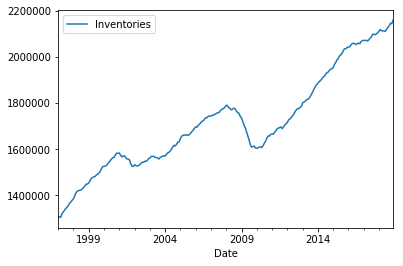

In [32]:
df3.plot()

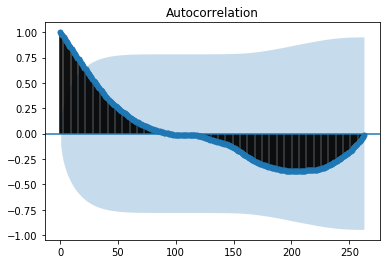

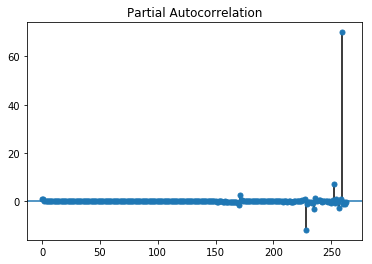

In [30]:
plot_acf(df3);
plot_pacf(df3);

In [34]:
from statsmodels.tsa.stattools import adfuller, kpss

In [37]:
adfuller(df2_new['Births'], maxlag=10) # null non-stationary,=> p<<0.05 => reject null

(-9.855384093160584,
 4.373545405991154e-17,
 0,
 119,
 {'1%': -3.4865346059036564,
  '10%': -2.579896092790057,
  '5%': -2.8861509858476264},
 747.4340839026098)

In [38]:
adfuller(df3['Inventories'])

(-0.08768390982064184,
 0.950651530229898,
 5,
 258,
 {'1%': -3.455952927706342,
  '10%': -2.572774990685656,
  '5%': -2.8728086526320302},
 4909.597979003463)

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

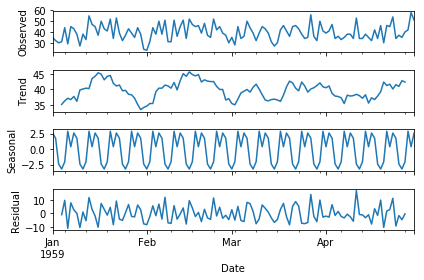

In [41]:
result2 = seasonal_decompose(df2_new['Births'])
result2.plot(); # look like seasonality 7 days !!!!

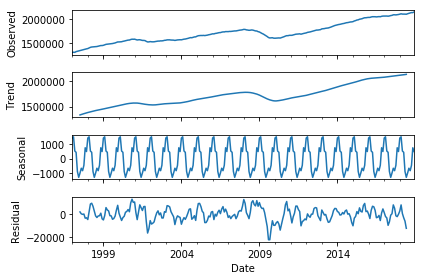

In [42]:
result3 = seasonal_decompose(df3['Inventories'])
result3.plot();

In [43]:
df2_new.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-04-21', '1959-04-22', '1959-04-23', '1959-04-24',
               '1959-04-25', '1959-04-26', '1959-04-27', '1959-04-28',
               '1959-04-29', '1959-04-30'],
              dtype='datetime64[ns]', name='Date', length=120, freq='D')

In [44]:
auto_arima(df2_new['Births'], m=7, seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 26 Apr 2019   AIC                            823.489
Time:                        21:57:48   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
auto_arima(df2_new['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Fri, 26 Apr 2019   AIC                            822.741
Time:                        21:59:27   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.927      0.000      39.605      40.028
ar.L1.y        1.8569      0.081     22.944      0.000       1.698       2.016
ar.L2.y       -0.8815      0.073    -12.037      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.131      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.023      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0651           -0.0237
AR.2            1.0533           +0.1582j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1582           +0.0000j            1.1582            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
train = df2_new.iloc[:90]
test = df2_new.iloc[90:]

In [48]:
model = ARMA(train['Births'], order=(2,2))
results = model.fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 26 Apr 2019   AIC                            627.809
Time:                        22:03:21   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
start = len(train)
end = len(train) + len(test) -1
predictions = results.predict(start=start, end=end)

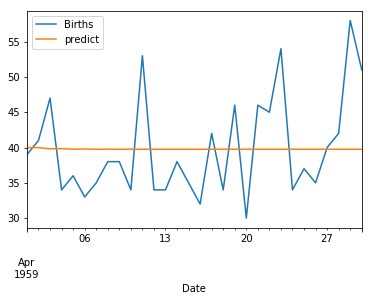

In [55]:
test['Births'].plot(legend=True)
predictions.plot(legend=True, label='predict') # there was no trend or anything , stationary, so averaged value is almost set for forcast

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [59]:
model2 = SARIMAX(train['Births'], seasonal_order=(0,0,0,7)) # not making a differece with ot without seasonal order
results2 = model2.fit()
predictions2 = results2.predict(start=start, end=end)

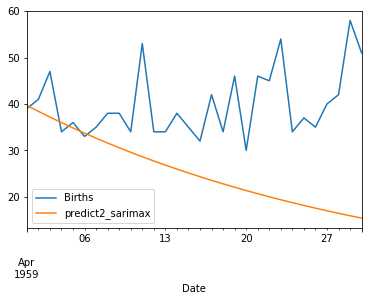

In [60]:
test['Births'].plot(legend=True)
predictions2.plot(legend=True, label='predict2_sarimax')

In [61]:
adfuller(df3['Inventories']) # non-stationary

(-0.08768390982064184,
 0.950651530229898,
 5,
 258,
 {'1%': -3.455952927706342,
  '10%': -2.572774990685656,
  '5%': -2.8728086526320302},
 4909.597979003463)

In [63]:
from statsmodels.tsa.statespace.tools import diff
adfuller(diff(df3['Inventories'], k_diff=1)) # stationary

(-3.4122493919348043,
 0.010548311489190486,
 4,
 258,
 {'1%': -3.455952927706342,
  '10%': -2.572774990685656,
  '5%': -2.8728086526320302},
 4888.3029144158)

In [65]:
df3.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=264, freq='MS')

In [67]:
auto_arima(df3['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 26 Apr 2019   AIC                           5228.505
Time:                        22:22:18   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [68]:
auto_arima(df3['Inventories'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 26 Apr 2019   AIC                           5348.037
Time:                        22:22:43   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

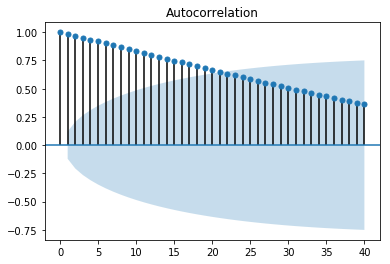

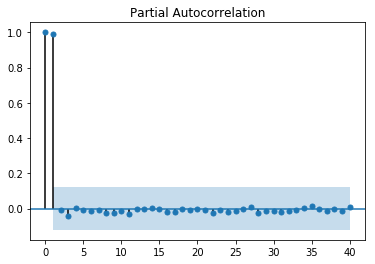

In [70]:
plot_acf(df3['Inventories'], lags=40);
plot_pacf(df3['Inventories'], lags=40);

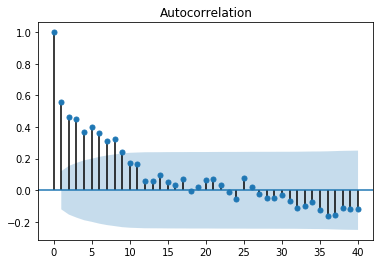

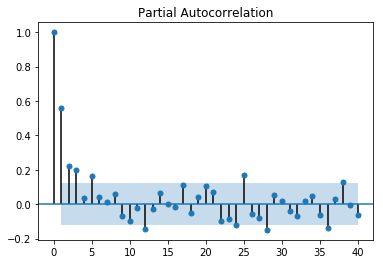

In [72]:
plot_acf(diff(df3['Inventories'], k_diff=1), lags=40);
plot_pacf(diff(df3['Inventories'], k_diff=1), lags=40);

In [74]:
model = auto_arima(df3['Inventories'], seasonal=False, start_p=0, start_q=0, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.047 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.028 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.105 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.528, BIC=5247.389, Fit time=0.129 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.099 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.147 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.599 seconds


In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 26 Apr 2019   AIC                           5228.505
Time:                        22:33:42   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [83]:
train = df3.iloc[:252]
test = df3.iloc[252:]
start = len(train)
end = len(train) + len(test) -1

In [84]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
predictions = results.predict(start=start, end=end, typ='levels') #predict original, otherwise typ='linear(and predict differenced data)
# which is not useful

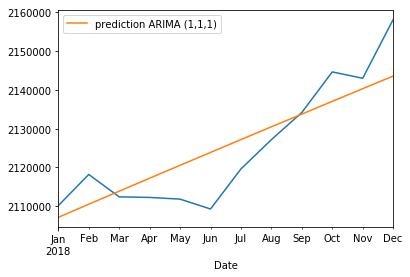

In [85]:
test['Inventories'].plot()
predictions.plot(legend=True, label='prediction ARIMA (1,1,1)') # is a bit off since seasonal not considered

In [86]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test['Inventories'], predictions)

60677824.72190262

In [87]:
test['Inventories'].mean()

2125075.6666666665

In [90]:
model = ARIMA(df3['Inventories'], order=(1,1,1))
results = model.fit()
forcast = results.predict(start=len(df3), end=len(df3)+16, typ='levels')

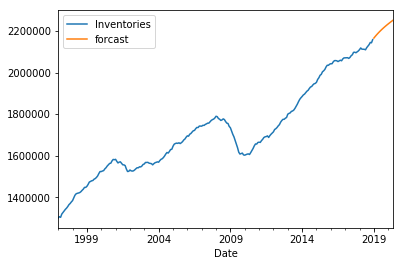

In [91]:
df3['Inventories'].plot(legend=True)
forcast.plot(legend=True, label='forcast')

## SARIMA, SARIMAX

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAX

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [95]:
df = pd.read_csv('J/UDEMY-TSA-FINAL/Data/co2_mm_mlo.csv')

In [96]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [107]:
def date_maker(x, y):
    return str(int(x))+'-'+str(int(y))

df['date'] = df.apply(lambda z:date_maker(z.year,z.month), axis=1)

In [108]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-3
1,1958,4,1958.292,317.45,317.45,1958-4
2,1958,5,1958.375,317.50,317.50,1958-5
3,1958,6,1958.458,NaN,317.10,1958-6
4,1958,7,1958.542,315.86,315.86,1958-7


In [111]:
# another way df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})
df['date'] = pd.to_datetime(df['date'])

In [110]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [113]:
df.index.freq = 'MS'

In [114]:
df.set_index('date', inplace=True)

In [116]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [117]:
df.drop(columns=['year', 'month'], axis=1, inplace=True)

In [118]:
df.head()

,decimal_date,average,interpolated
date,,,
1958-03-01,1958.208,315.71,315.71
1958-04-01,1958.292,317.45,317.45
1958-05-01,1958.375,317.50,317.50
1958-06-01,1958.458,NaN,317.10
1958-07-01,1958.542,315.86,315.86


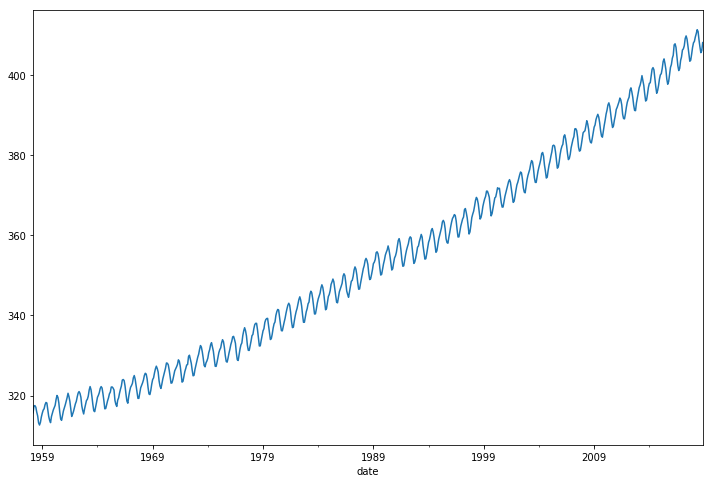

In [119]:
df['interpolated'].plot(figsize=(12,8))

In [120]:
results = seasonal_decompose(df['interpolated'], model='add')

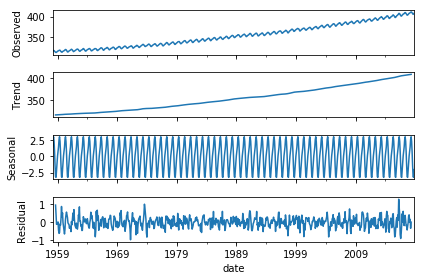

In [122]:
results.plot(); # seasonal

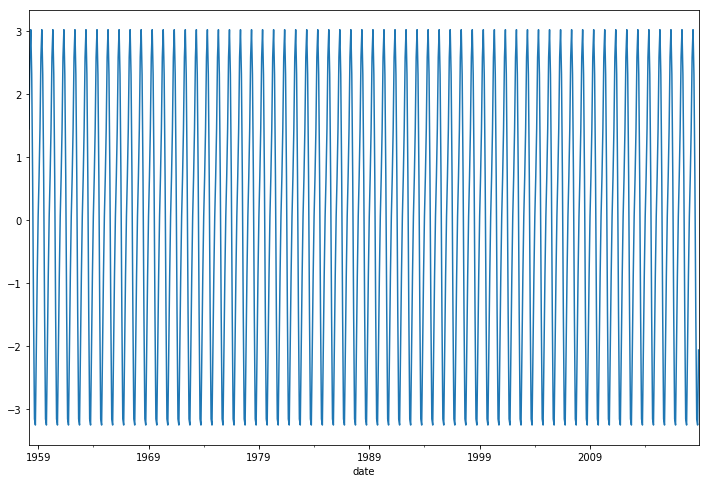

In [124]:
results.seasonal.plot(figsize=(12,8))

In [125]:
stepwise = auto_arima(df['interpolated'], seasonal=True, m=12, trace=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=463.221, BIC=499.943, Fit time=2.092 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2369.532, BIC=2378.713, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=804.125, BIC=822.486, Fit time=0.701 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1614.808, BIC=1633.170, Fit time=0.416 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1101.963, BIC=1134.095, Fit time=2.200 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 12); AIC=475.180, BIC=516.493, Fit time=5.386 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=758.923, BIC=791.055, Fit time=2.032 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=497.868, BIC=539.181, Fit time=5.502 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1440.918, BIC=1468.460, Fit time=0.601 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_or

In [126]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -207.840
Date:                            Sat, 27 Apr 2019   AIC                            429.679
Time:                                    00:19:32   BIC                            461.811
Sample:                                         0   HQIC                           442.078
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      1.773      0.076      -0.000       0.004
ma.L1         -0.3507      0.037     -9.456      0.000      -0.423      -0.278
ma.L2         -0.0688      0.036     -1.909      0.056      -0.139       0.002
ar.S.L12       0.9989      0.001   1889.340      0.000       0.998       1.000
ma.S.L12      -0.8632      0.037    -23.460      0.000      -0.935      -0.791
ma.S.L24       0.0192      0.038      0.503      0.615      -0.056       0.094
sigma2         0.0983      0.005     19.865      0.000       0.089       0.108
===================================================================================
Ljung-Box (Q):                       52.88   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.08   Prob(JB):                         0.14
Heteroskedasticity (H):               1.08   Skew:                            -0.01
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
train = df.iloc[:717]
test = df.iloc[717:]
model = SARIMAX(train['interpolated'], order=(0,1,2), seasonal_order=(1,0,2,12))

In [130]:
results = model.fit()

In [131]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -203.809
Date:                            Sat, 27 Apr 2019   AIC                            419.617
Time:                                    00:25:02   BIC                            447.059
Sample:                                03-01-1958   HQIC                           430.214
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3583      0.036     -9.881      0.000      -0.429      -0.287
ma.L2         -0.0621      0.033     -1.867      0.062      -0.127       0.003
ar.S.L12       0.9996      0.000   2728.031      0.000       0.999       1.000
ma.S.L12      -0.8608      0.032    -26.770      0.000      -0.924      -0.798
ma.S.L24       0.0006      0.033      0.017      0.986      -0.064       0.065
sigma2         0.0958      0.005     20.220      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       50.71   Jarque-Bera (JB):                 4.35
Prob(Q):                              0.12   Prob(JB):                         0.11
Heteroskedasticity (H):               1.12   Skew:                            -0.00
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
start = len(train)
end = len(train) + len(test) - 1

In [133]:
prediction = results.predict(start=start, end=end, typ='levels')

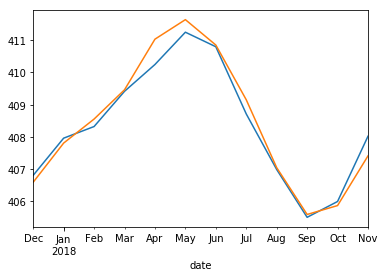

In [134]:
test['interpolated'].plot()
prediction.plot()

In [138]:
model = SARIMAX(df['interpolated'], order=(0,1,2), seasonal_order=(1,0,2,12))
results = model.fit()
forcast = results.predict(start=len(df['interpolated']), end=len(df['interpolated'])+20, typ='levels')

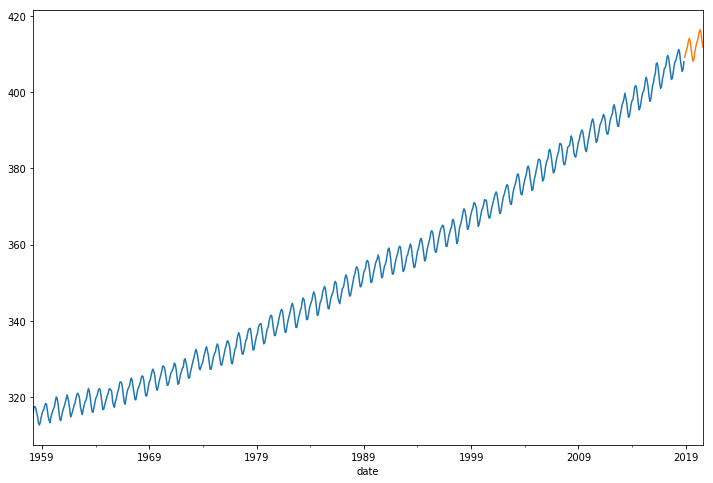

In [140]:
df['interpolated'].plot(figsize=(12,8))
forcast.plot()

## SARIMAX (X: exogenous regressor variable)

In [ ]:
exogenous variable: something like one-hot coded holiday, or weekday, or any additonal iformation that is an
added value in addition to time to predict the events/inventory/sale ...    